In [19]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for the classification models
import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data

In [20]:
data = pd.read_csv('data.csv')

In [21]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

### Classifier

In [22]:
clf = SVC(kernel='rbf', gamma=4, C=10000)
clf.fit(X_train, y_train)

SVC(C=10000, gamma=4)

### SVM rbf Prediction

In [25]:
def predict(test_data):
    
    #test_data = pd.DataFrame(test_data).T
    y_pred = clf.predict(test_data)
   
    return y_pred

In [26]:
y_pred = predict(X_test)

In [27]:
accuracy_1 = accuracy_score(y_test, y_pred)
print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
print('R-Squared Score',r2_score(y_test,y_pred))
print("Accuracy score", accuracy_score(y_test, y_pred))

Prediction accuracy MSE:  0.37719298245614036
R-Squared Score -0.6056338028169015
Accuracy score 0.6228070175438597


### Example of Stepwise selection

In [28]:
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data.diagnosis

In [29]:
sfs_forward = SequentialFeatureSelector(SVC(kernel = "rbf"), 
                                        n_features_to_select=5,
                                        direction='backward').fit(X, y)

In [30]:
selected = sfs_forward.get_support(indices=True)
f_names = np.array(X.columns)
print("Selected input features using Forward Stepwise Selection", f_names[selected])

Selected input features using Forward Stepwise Selection ['smoothness_mean' 'concavity_mean' 'concave points_mean' 'symmetry_mean'
 'fractal_dimension_mean']


In [31]:
x_manip = X[f_names[selected]]
print(x_manip)

     smoothness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.11840         0.30010              0.14710         0.2419   
1            0.08474         0.08690              0.07017         0.1812   
2            0.10960         0.19740              0.12790         0.2069   
3            0.14250         0.24140              0.10520         0.2597   
4            0.10030         0.19800              0.10430         0.1809   
..               ...             ...                  ...            ...   
564          0.11100         0.24390              0.13890         0.1726   
565          0.09780         0.14400              0.09791         0.1752   
566          0.08455         0.09251              0.05302         0.1590   
567          0.11780         0.35140              0.15200         0.2397   
568          0.05263         0.00000              0.00000         0.1587   

     fractal_dimension_mean  
0                   0.07871  
1                   0.05667

In [32]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_manip, y, test_size=0.2, random_state=42)

In [33]:
model = SVC(kernel='rbf', C=10000)
model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)

In [34]:
accuracy_2 = accuracy_score(y_test1, y_pred1)
print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
print('R-Squared Score',r2_score(y_test1,y_pred1))
print("Accuracy score", accuracy_score(y_test1, y_pred1))

Prediction accuracy MSE:  0.07894736842105263
R-Squared Score 0.663937111038323
Accuracy score 0.9210526315789473


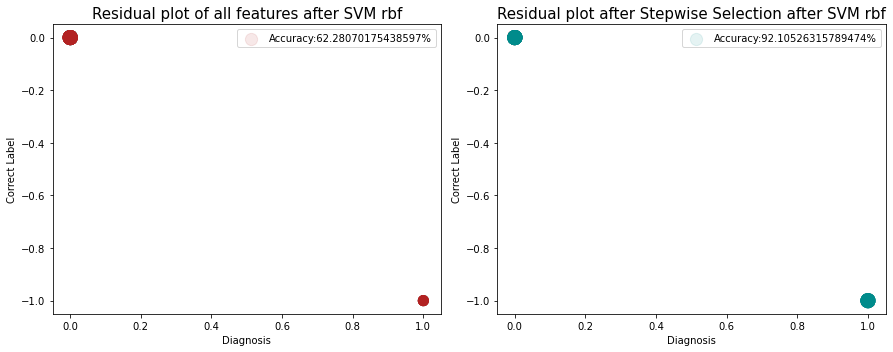

In [35]:
fig,ax = plt.subplots(1,2,figsize=(12.5,5))
ax[0].scatter(y_test, y_pred - y_test,s=(200-(100*abs(y_pred-y_test))),alpha=0.1,c= 'FireBrick',label = "Accuracy:"+str(accuracy_1*100)+"%")
ax[0].set_title('Residual plot of all features after SVM rbf', fontsize=15)
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].legend()

ax[1].scatter(y_test1, y_pred - y_test,s=(200-(100*abs(y_pred1-y_test1))), alpha=0.1,c= 'DarkCyan',label = "Accuracy:"+str(accuracy_2*100)+"%")
ax[1].set_title('Residual plot after Stepwise Selection after SVM rbf', fontsize=15)
ax[1].set_xlabel('Diagnosis')
ax[1].set_ylabel('Correct Label')
ax[1].legend()

plt.tight_layout()

### Sample Train, Test, Split results

In [44]:
def sample_results():
    ''' 
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_pred = clf.predict(X_test)
    print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
    print("Mean accuracy on test set", clf.score(X_test, y_test))
    print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    return

Prediction accuracy MSE:  0.37719298245614036
Mean accuracy on test set 0.6228070175438597
The confusion matrix for the sample dataset using a decision tree is displayed below: 
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/home/keitonguan/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keitonguan/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keitonguan/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


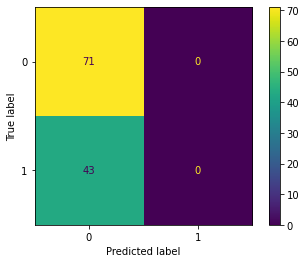

In [45]:
'''This matrix is only for Non-stepwise SVM only'''
sample_results()

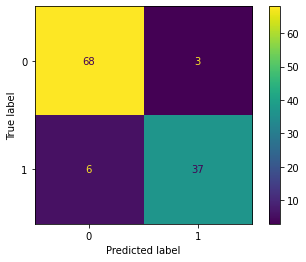

Prediction accuracy MSE:  0.07894736842105263


In [46]:
'''This matrix is for Stepwise SVM'''
plot_confusion_matrix(model, X_test1, y_test1)
plt.show()
print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))